load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
import seaborn as sns

load dataset

In [2]:
df = pd.read_csv(r'/Users/melki/Desktop/cardekho_data.csv')

look at sample data

In [3]:
df.sample(4)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
149,Bajaj Pulsar 220 F,2016,0.51,0.94,24000,Petrol,Individual,Manual,0
240,verna,2012,5.35,9.40,32322,Diesel,Dealer,Manual,0
206,xcent,2017,5.75,7.13,12479,Petrol,Dealer,Manual,0
202,grand i10,2015,4.40,5.70,28200,Petrol,Dealer,Manual,0


look at shape of data

In [4]:
df.shape

(301, 9)

look at some info from the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


look at column statistics

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


convert columns to lower case for ease

In [7]:
df.columns = df.columns.str.lower()

look for null values

In [9]:
df.isna().sum()

car_name         0
year             0
selling_price    0
present_price    0
kms_driven       0
fuel_type        0
seller_type      0
transmission     0
owner            0
dtype: int64

check for duplicated data

In [10]:
df.duplicated().sum()

2

drop duplicates

In [13]:
df.drop_duplicates(inplace = True)

verify via shape

In [15]:
df.shape

(299, 9)

In [8]:
df.sample(2)

,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner
182,Honda CB Shine,2013,0.3,0.58,30000,Petrol,Individual,Manual,0
258,city,2015,8.4,13.60,25000,Petrol,Dealer,Manual,0


**look at the transmission distribution**

In [16]:
df['transmission'].value_counts()

transmission
Manual       260
Automatic     39
Name: count, dtype: int64

_overwhelming majority of cars are manual_

**look at distribution of selling price**

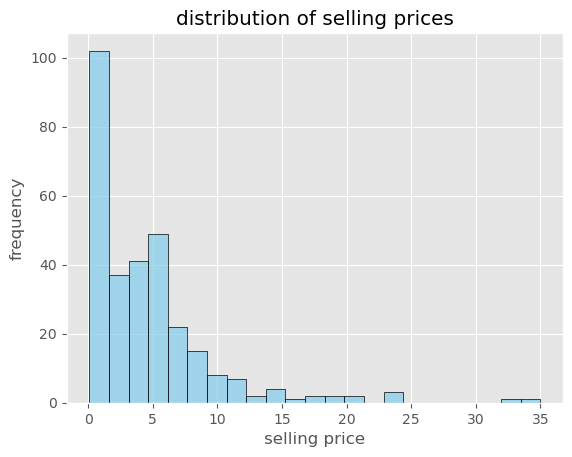

In [22]:
sns.histplot(df['selling_price'], color = 'skyblue', edgecolor = 'black')
plt.title('distribution of selling prices')
plt.xlabel('selling price')
plt.ylabel('frequency')
plt.show()

**analyze prices based on transmission type**

In [24]:
df.groupby('transmission')['selling_price'].mean().sort_values(ascending = False)

transmission
Automatic    9.071795
Manual       3.917308
Name: selling_price, dtype: float64

*automatic cars have a way higher selling price*

**analyze prices based on fuel type**

In [30]:
fuel_based_prices = df.groupby('fuel_type')['selling_price'].mean().sort_values(ascending = False)
fuel_based_prices

fuel_type
Diesel    10.102759
Petrol     3.264184
CNG        3.100000
Name: selling_price, dtype: float64

*diesel cars have a way higher selling price*

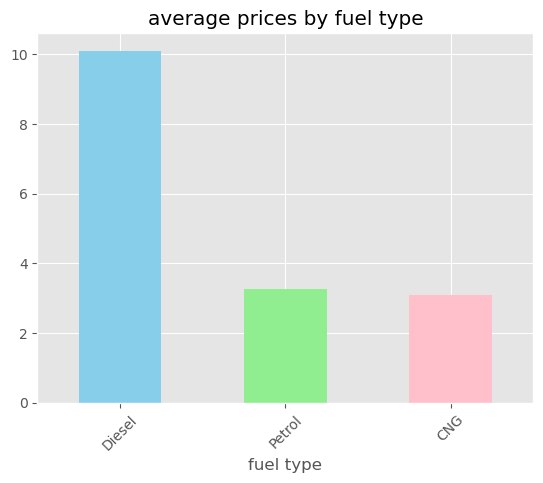

In [33]:
fuel_based_prices.plot(kind = 'bar', color = ['skyblue', 'lightgreen', 'pink'])
plt.xticks(rotation = 45)
plt.xlabel('fuel type')
plt.title('average prices by fuel type')
plt.show()

**visualizing cars by transmission types**

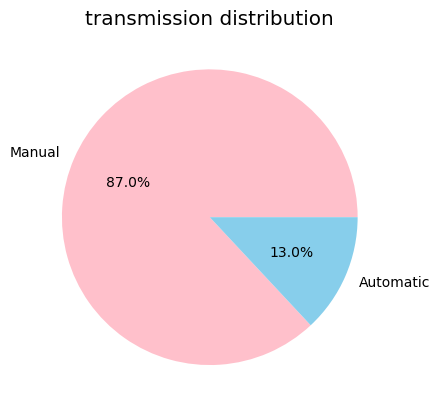

In [51]:
transmission_grouping = df['transmission'].value_counts()
plt.pie(transmission_grouping, labels = transmission_grouping.index, autopct = '%1.1f%%', colors = ['pink','skyblue'])
plt.title('transmission distribution')
plt.show()

**analyze car prices based on kilometers driven**

In [50]:
df.groupby('kms_driven')['selling_price'].mean().sort_values(ascending = False)

kms_driven
78000     26.875
41000     19.990
135000    16.000
104707    14.900
47000     13.475
           ...  
22000      0.250
1900       0.250
55000      0.200
500000     0.170
92233      0.100
Name: selling_price, Length: 206, dtype: float64

**analyzing prices based on seller type _(individual or dealer)_**

In [52]:
df.groupby('seller_type')['selling_price'].mean().sort_values(ascending = False)

seller_type
Dealer        6.632021
Individual    0.870943
Name: selling_price, dtype: float64

_cars sold by dealerships have a much higher average selling price. over 7x higher than cars sold by individuals_

**relationship between year and car price**

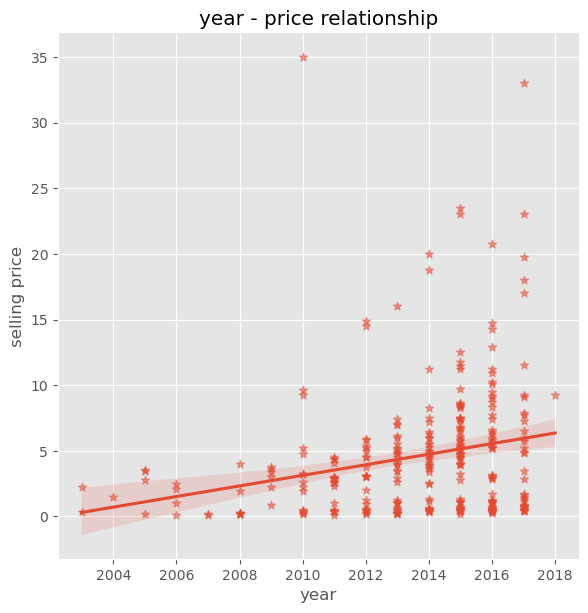

In [68]:
sns.lmplot(x = 'year', y = 'selling_price', data = df, scatter_kws = {'alpha':0.5}, markers = '*', height = 6)
plt.xlabel('year')
plt.ylabel('selling price')
plt.title('year - price relationship')
plt.show()

**relationship between: year, average selling price, and average present price**

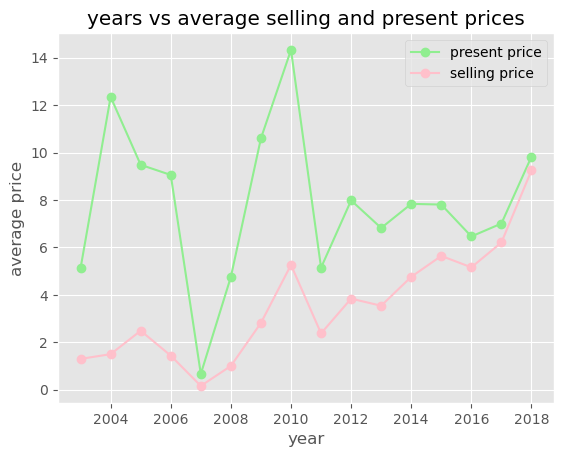

In [82]:
plt.plot(df.groupby('year')['present_price'].mean(), marker = 'o', color = 'lightgreen', label = 'present price')
plt.plot(df.groupby('year')['selling_price'].mean(), marker = 'o', color = 'pink', label = 'selling price')
plt.title('years vs average selling and present prices')
plt.xlabel('year')
plt.ylabel('average price')
plt.legend(loc = 'upper right')
plt.show()

_cars ALWAYS sell at a lower price that the available/present price._

_biggest margin being in **2010** which could be attributed to the recession of that time_

**analyzing selling prices based on the fuel type and transmission type of the cars**

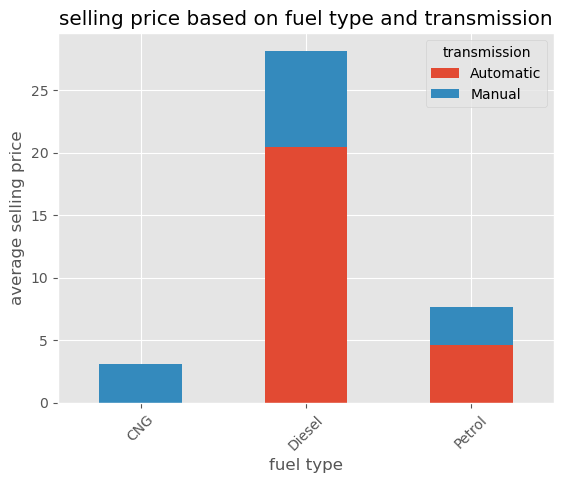

In [89]:
df.groupby(['fuel_type', 'transmission'])['selling_price'].mean().unstack().plot(kind = 'bar', stacked = True)
plt.title('selling price based on fuel type and transmission')
plt.xticks(rotation = 45)
plt.ylabel('average selling price')
plt.xlabel('fuel type')
plt.show()

**analyzing trends in kilometers driven over the years based on fuel type**

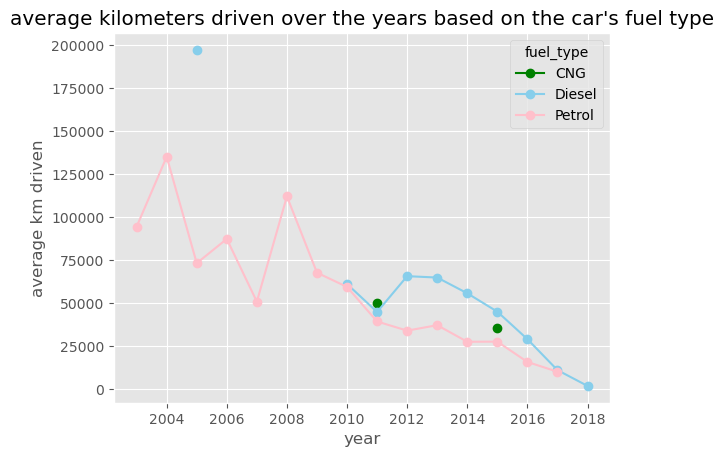

In [104]:
df.groupby(['year', 'fuel_type'])['kms_driven'].mean().unstack().plot(kind = 'line', marker = 'o', color = ['green', 'skyblue', 'pink'])
plt.title('average kilometers driven over the years based on the car\'s fuel type')
plt.ylabel('average km driven')
plt.show()

**analyzing trends in kilometers driven over the years based on transmission**

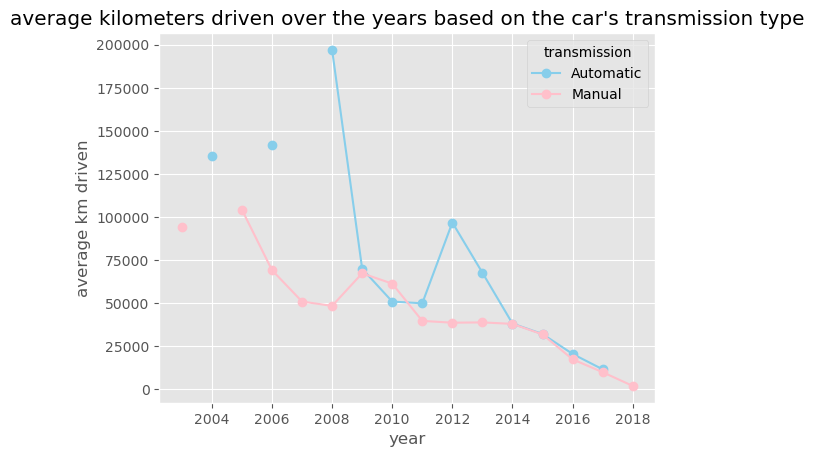

In [107]:
df.groupby(['year', 'transmission'])['kms_driven'].mean().unstack().plot(kind = 'line', marker = 'o', color = ['skyblue', 'pink'])
plt.title('average kilometers driven over the years based on the car\'s transmission type')
plt.ylabel('average km driven')
plt.show()

In [111]:
x = df[['year', 'kms_driven', 'transmission', 'owner', 'seller_type']]
y = df['selling_price']        

In [114]:
numerical_data = x.select_dtypes(include = 'int').columns

In [116]:
correlation = df[numerical_data].corr()
correlation

,year,kms_driven,owner
year,1.000000,-0.525714,-0.181639
kms_driven,-0.525714,1.000000,0.089367
owner,-0.181639,0.089367,1.000000


encoding categorical data in X

In [123]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [124]:
x['transmission'] = encoder.fit_transform(x['transmission'])
x['seller_type'] = encoder.fit_transform(x['seller_type'])

/var/folders/2r/gg9chh5s6sl9_hlrjm2lpq4c0000gn/T/ipykernel_63598/2844574511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['transmission'] = encoder.fit_transform(x['transmission'])
/var/folders/2r/gg9chh5s6sl9_hlrjm2lpq4c0000gn/T/ipykernel_63598/2844574511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['seller_type'] = encoder.fit_transform(x['seller_type'])


verifying...

In [108]:
df.columns

Index(['car_name', 'year', 'selling_price', 'present_price', 'kms_driven',
       'fuel_type', 'seller_type', 'transmission', 'owner'],
      dtype='object')

split data into train, test, and split

In [126]:
from sklearn.model_selection import train_test_split as t

In [127]:
x_train, x_test, y_train, y_test = t(x, y, test_size = 0.2, random_state = 1)

standardizing x values

In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [130]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [136]:
print('train data: \n\n', x_train_scaled[:5])
print('\n\ntest data: \n\n', x_test_scaled[:5])

train data: 

 [[-1.22943462 -0.25760084  0.37886762 -0.17520011  1.40978722]
 [ 0.46316258  0.05178264  0.37886762 -0.17520011 -0.7093269 ]
 [ 1.14020147  0.01531611  0.37886762 -0.17520011 -0.7093269 ]
 [-1.56795407  0.05123624  0.37886762 -0.17520011  1.40978722]
 [ 0.80168202 -0.31642243 -2.63944439 -0.17520011 -0.7093269 ]]


test data: 

 [[-0.96977338  1.89636207  0.42008403 -0.18569534  1.14354375]
 [ 0.93174305 -1.00987618  0.42008403 -0.18569534 -0.87447463]
 [ 1.31204634 -0.82738512 -2.38047614 -0.18569534 -0.87447463]
 [-1.35007667  0.53448848  0.42008403 -0.18569534  1.14354375]
 [ 0.93174305 -0.94087459  0.42008403 -0.18569534 -0.87447463]]


methods for evaluation

In [155]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

def evaluator(model, pred):
    print(f'the mean squared error is {round(mean_squared_error(y_test, pred),4)}')
    print(f'the root mean squared error is {round(math.sqrt(mean_squared_error(y_test, pred)),4)}')
    print(f'the mean absolute error of is {round(mean_absolute_error(y_test, pred),4)}')
    print(f'the r2 score is {round(r2_score(y_test, pred),4)}')

creating models for training

In [139]:
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train_scaled, y_train)
linear_regression_predictions = linear_regression_model.predict(x_test_scaled)

evaluating linear regression model

In [157]:
linear_results = evaluator(linear_regression_model, linear_regression_predictions)
linear_results

the mean squared error is 24.8904
the root mean squared error is 4.989
the mean absolute error of is 2.6799
the r2 score is 0.374


training a gridsearch model via support vector machines

In [147]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [151]:
p1 = {
    'kernel' : ['linear', 'poly', 'rbf'],
    'C':[0.1,0.5,1],
    'epsilon': [0.05, 0.1, 0.2, 0.5]
}

In [152]:
gridSVR = GridSearchCV(estimator = SVR(), param_grid = p1)
gridSVR.fit(x_train_scaled, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 0.5, 1], 'epsilon': [0.05, 0.1, 0.2, 0.5],
                         'kernel': ['linear', 'poly', 'rbf']})

In [153]:
gridSVR_predictions = gridSVR.predict(x_test_scaled)

model's best parameters

In [159]:
gridSVR.best_params_

{'C': 1, 'epsilon': 0.5, 'kernel': 'rbf'}

In [158]:
svr_results = evaluator(gridSVR, gridSVR_predictions)
svr_results

the mean squared error is 29.3991
the root mean squared error is 5.4221
the mean absolute error of is 2.3809
the r2 score is 0.2606


In [161]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [163]:
p2 = {
    'n_estimators':[45, 50, 55, 70, 200],
    'learning_rate':[0.01, 0.05, 0.1, 0.3]
}

p3 = {
    'n_estimators':[45, 50, 55, 70, 200],
    'max_depth':[None, 5, 10, 50, 100]
}

In [164]:
gridXG = GridSearchCV(estimator = XGBRegressor(), param_grid = p2)
gridRF = GridSearchCV(estimator = RandomForestRegressor(), param_grid = p3)

In [165]:
gridXG.fit(x_train_scaled, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3],
                         'n_estimators': [45, 50, 55, 70, 200]})

In [166]:
gridRF.fit(x_train_scaled, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10, 50, 100],
                         'n_estimators': [45, 50, 55, 70, 200]})

In [167]:
gridXG_predicitons = gridXG.predict(x_test_scaled)

In [168]:
gridRF_predictons = gridRF.predict(x_test_scaled)

overview of their respective best parameters

In [169]:
gridXG.best_params_

{'learning_rate': 0.05, 'n_estimators': 70}

In [170]:
gridRF.best_params_

{'max_depth': 5, 'n_estimators': 50}

evaluating the xgboost regressor

In [173]:
xgboost_results = evaluator(gridXG, gridXG_predicitons)
xgboost_results

the mean squared error is 37.992
the root mean squared error is 6.1638
the mean absolute error of is 4.1276
the r2 score is 0.0444


evaluating the random forest regressor

In [174]:
rf_results = evaluator(gridRF, gridRF_predictons)
rf_results

the mean squared error is 28.6948
the root mean squared error is 5.3568
the mean absolute error of is 2.6124
the r2 score is 0.2783


### my thoughts

it is evident based on the evaluation metrics that the **linear regression model** is the best model for this specific use case

outputing the coefficients of the linear regresssion model

In [178]:
cdf = pd.DataFrame(linear_regression_model.coef_, x.columns, columns = ['Coefficients'])
cdf

,Coefficients
year,1.416741
kms_driven,0.221100
transmission,-1.469192
owner,0.051351
seller_type,-2.493963


### insights from the best model: Linear Regression

as evident from the model's coefficients, the top 3 variables that influence the selling price of cars per the dataset are:

1. year (by far)

2. kilometers driven

3. transmission type (slighly weak coefficient)